In [142]:
import cvxpy as cp
import numpy as np
import random
import matplotlib.pyplot as plt

In [209]:
def leastsquare(x):
    return np.linalg.norm(A@x,2)**2

def ls_gradient(x):
    return 2*np.transpose(A)@A@x

def gradient_update(x,h):
    # print(ls_gradient(x))
    return x - h*(ls_gradient(x))

def accgrad_update(x,y,h,k):
    x_next = y - h*(ls_gradient(y))
    y_next = x_next + (k-1)/(k+2)*(x_next - x) 
    return x_next, y_next

def quad_form(x):
    return cp.quad_form(x,A).value

## Least Squares

In [215]:
np.random.seed(2022)
A = np.random.normal(0,1,(20,20))
ITER = 1000
A_maxeig = max(np.linalg.eigvals(np.transpose(A)@A))

In [216]:
# calculate fstar
x = cp.Variable(20)
obj = cp.Minimize(cp.sum_squares(A@x))
prob = cp.Problem(obj)
fstar = prob.solve()
print(fstar, x.value)

0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [217]:
x = np.ones(20)
ITER = 3000
gd_val = np.zeros(ITER)
# A = np.array([[1,2],[3,4]])
for i in range(ITER):
    # print(x)
    gd_val[i] = leastsquare(x)
    x = gradient_update(x,0.009)
# computing the best iterate
for i in np.arange(ITER):
    gd_val[i] = np.min(gd_val[0:i+1])   

min(gd_val)

0.004898556624029155

In [218]:
x = np.ones(20)
ITER = 3000
ag_val = np.zeros(ITER)
x = np.ones(20)
y = np.ones(20)
for i in range(ITER):
    ag_val[i] = leastsquare(x)
    x,y = accgrad_update(x,y,0.009,i)

# computing the best iterate
for i in np.arange(ITER):
    ag_val[i] = np.min(ag_val[0:i+1])  
    
min(ag_val)

3.880495541481994e-13

/var/folders/q4/trxghvfn21sdx12kbtpt92n00000gn/T/ipykernel_39988/4206077119.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(ITER)), -np.log(ag_val), color = 'red', label = 'AGD')
/var/folders/q4/trxghvfn21sdx12kbtpt92n00000gn/T/ipykernel_39988/4206077119.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(ITER)), -np.log(gd_val), color = 'blue', label = 'Gradient Descent')


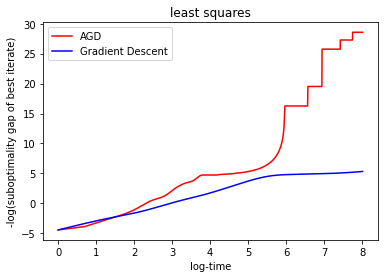

In [219]:

plt.plot(np.log(np.arange(ITER)), -np.log(ag_val), color = 'red', label = 'AGD')
plt.plot(np.log(np.arange(ITER)), -np.log(gd_val), color = 'blue', label = 'Gradient Descent')
plt.ylabel('-log(suboptimality gap of best iterate)')
plt.xlabel('log-time')
plt.title('least squares')
plt.legend()
plt.show()

## xTAX

In [220]:
A = np.zeros((20,20))
for i in range(20):
    A[i,i] = 2
    if i < 19:
        A[i+1,i] = -1
        A[i,i+1] = -1

In [221]:
# calculate fstar
x = cp.Variable(20)
obj = cp.Minimize(cp.quad_form(x,A))
prob = cp.Problem(obj)
fstar = prob.solve()
print(fstar, x.value)

0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [222]:
x = np.ones(20)
ITER = 3000
gd_val = np.zeros(ITER)
# A = np.array([[1,2],[3,4]])
for i in range(ITER):
    # print(x)
    gd_val[i] = quad_form(x)
    x = gradient_update(x,0.009)
# computing the best iterate
for i in np.arange(ITER):
    gd_val[i] = np.min(gd_val[0:i+1])   

min(gd_val)

0.36418961339632033

In [223]:
x = np.ones(20)
ITER = 3000
ag_val = np.zeros(ITER)
x = np.ones(20)
y = np.ones(20)
for i in range(ITER):
    ag_val[i] = quad_form(x)
    x,y = accgrad_update(x,y,0.009,i)

# computing the best iterate
for i in np.arange(ITER):
    ag_val[i] = np.min(ag_val[0:i+1])  

min(ag_val)

7.160798361986581e-07

/var/folders/q4/trxghvfn21sdx12kbtpt92n00000gn/T/ipykernel_39988/648423508.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(ITER)), -np.log(ag_val), color = 'red', label = 'AGD')
/var/folders/q4/trxghvfn21sdx12kbtpt92n00000gn/T/ipykernel_39988/648423508.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(ITER)), -np.log(gd_val), color = 'blue', label = 'Gradient Descent')


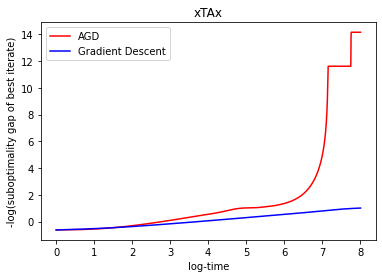

In [224]:

plt.plot(np.log(np.arange(ITER)), -np.log(ag_val), color = 'red', label = 'AGD')
plt.plot(np.log(np.arange(ITER)), -np.log(gd_val), color = 'blue', label = 'Gradient Descent')
plt.ylabel('-log(suboptimality gap of best iterate)')
plt.xlabel('log-time')
plt.title('xTAx')
plt.legend()
plt.show()